In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження результатів передбачення
results = pd.read_csv('../data/prediction_results.csv')
print("Розмір даних з результатами:", results.shape)


Розмір даних з результатами: (177, 15)


In [3]:
# Зчитування файлів
new_data = pd.read_csv('../data/new_data.csv')
prime_data = pd.read_csv('../data/prime_dataset.csv')

In [5]:
# Стовпці для пошуку відповідності
match_columns = ['e', 'a', 'q']
print(f"Стовпці для пошуку відповідності: {match_columns}")

# Перевірка, чи всі необхідні стовпці є у обох файлах
for col in match_columns:
    if col not in new_data.columns or col not in prime_data.columns:
        raise ValueError(f"Стовпець '{col}' відсутній у одному з файлів.")

# Створення списку для результатів
matched_data = []

# Знаходження відповідних рядків
for _, new_row in new_data.iterrows():
    # Фільтруємо prime_data за значеннями зі стовпців 'e', 'a', 'q'
    mask = (prime_data[match_columns] == new_row[match_columns]).all(axis=1)
    match = prime_data[mask]
    
    if not match.empty:
        # Якщо є збіг, беремо значення діаметра з першого знайденого рядка
        actual_diameter = match['diameter'].values[0]
        # Копіюємо весь рядок із new_data та додаємо реальний діаметр
        row_with_actual = new_row.to_dict()
        row_with_actual['actual_diameter'] = actual_diameter
        matched_data.append(row_with_actual)
    else:
        # Якщо збігу немає, додаємо рядок без діаметра
        row_with_actual = new_row.to_dict()
        row_with_actual['actual_diameter'] = None
        matched_data.append(row_with_actual)
        print(f"Попередження: Не знайдено відповідності для рядка {new_row[match_columns].to_dict()}")

# Створення нового датафрейму з результатами
result_df = pd.DataFrame(matched_data)

# Збереження у файл
output_file = '../data/new_data_with_actual.csv'
result_df.to_csv(output_file, index=False)

print(f"Файл зі значеннями дійсного діаметра збережено в {output_file}")



Стовпці для пошуку відповідності: ['e', 'a', 'q']
Файл зі значеннями дійсного діаметра збережено в ../data/new_data_with_actual.csv


In [6]:
import pandas as pd

# Зчитуємо файли
new_data_with_actual = pd.read_csv('../data/new_data_with_actual.csv')
prediction_results = pd.read_csv('../data/prediction_results.csv')

# Фільтруємо рядки у `new_data_with_actual`, де `actual_diameter` не є пропущеним
filtered_actual_data = new_data_with_actual[new_data_with_actual['actual_diameter'].notnull()]

# Об'єднуємо таблиці за стовпцями `H` та `albedo`
merged_data = pd.merge(
    filtered_actual_data,
    prediction_results,
    on=['H', 'albedo'],
    suffixes=('_actual', '_predicted')
)

# Збереження результату у файл
output_file = '../data/comparison_table.csv'
merged_data.to_csv(output_file, index=False)

print(f"Об'єднана таблиця для порівняння збережена в {output_file}")

Об'єднана таблиця для порівняння збережена в ../data/comparison_table.csv


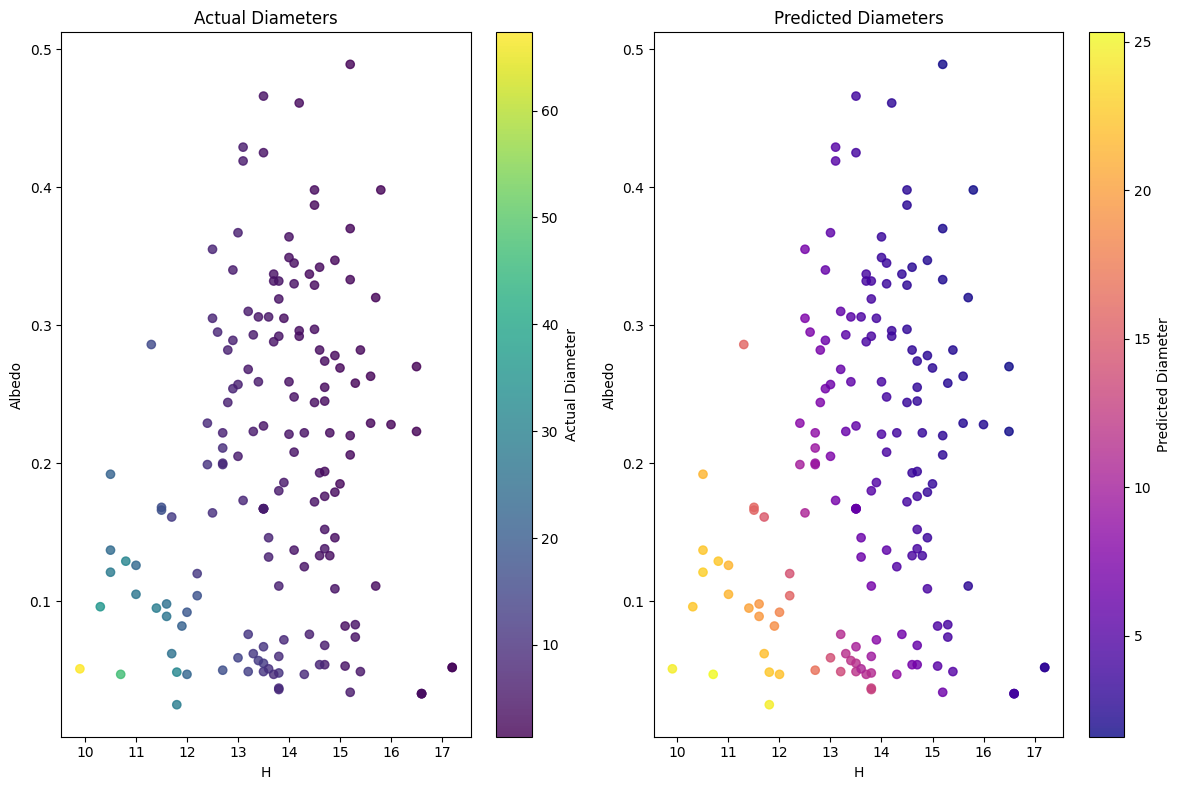

Графік збережено у файл ../data/comparison_regression_plot.png


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Зчитуємо файл для порівняння
comparison_data = pd.read_csv('../data/comparison_table.csv')

# Створюємо фігуру та дві діаграми
plt.figure(figsize=(12, 8))

# Перша діаграма — дійсні значення діаметру
plt.subplot(1, 2, 1)
scatter_actual = plt.scatter(
    comparison_data['H'], 
    comparison_data['albedo'], 
    c=comparison_data['actual_diameter'], 
    cmap='viridis', 
    alpha=0.8
)
plt.colorbar(scatter_actual, label="Actual Diameter")
plt.title("Actual Diameters")
plt.xlabel("H")
plt.ylabel("Albedo")

# Друга діаграма — спрогнозовані значення діаметру
plt.subplot(1, 2, 2)
scatter_predicted = plt.scatter(
    comparison_data['H'], 
    comparison_data['albedo'], 
    c=comparison_data['diameter_pred'], 
    cmap='plasma', 
    alpha=0.8
)
plt.colorbar(scatter_predicted, label="Predicted Diameter")
plt.title("Predicted Diameters")
plt.xlabel("H")
plt.ylabel("Albedo")

# Збереження графіку
plt.tight_layout()
output_file = "../data/comparison_regression_plot.png"
plt.savefig(output_file)
plt.show()

print(f"Графік збережено у файл {output_file}")

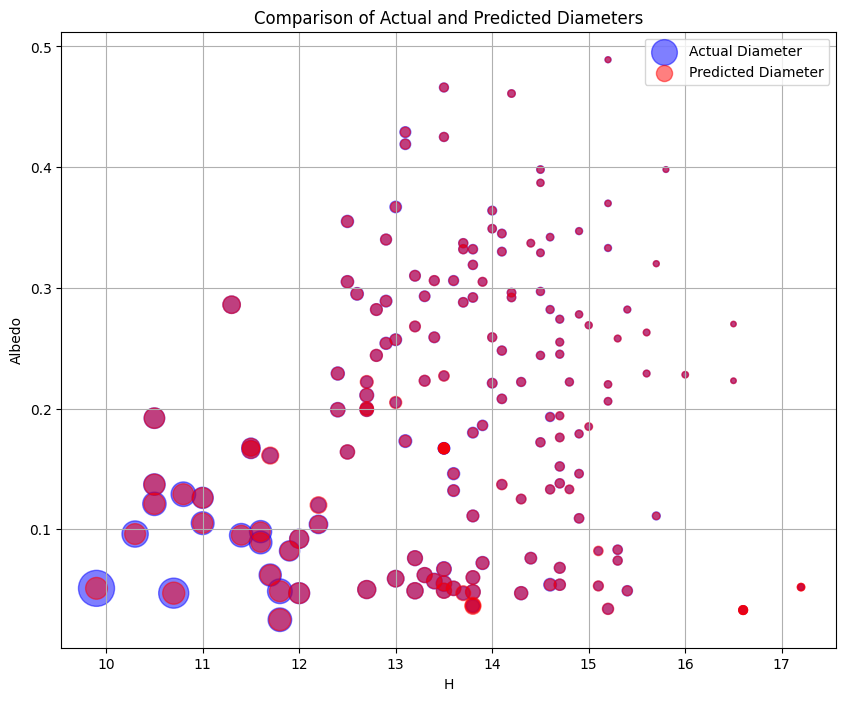

Графік збережено у файл ../data/comparison_overlay_plot.png


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Зчитуємо дані для порівняння
comparison_data = pd.read_csv('../data/comparison_table.csv')

# Створюємо фігуру
plt.figure(figsize=(10, 8))

# Додамо точки для дійсних значень діаметру
plt.scatter(
    comparison_data['H'], 
    comparison_data['albedo'], 
    c='blue', 
    alpha=0.5, 
    s=comparison_data['actual_diameter'] * 10,  # Масштаб розміру точок
    label='Actual Diameter'
)

# Додамо точки для спрогнозованих значень діаметру
plt.scatter(
    comparison_data['H'], 
    comparison_data['albedo'], 
    c='red', 
    alpha=0.5, 
    s=comparison_data['diameter_pred'] * 10,  # Масштаб розміру точок
    label='Predicted Diameter'
)

# Налаштування осей
plt.xlabel("H")
plt.ylabel("Albedo")
plt.title("Comparison of Actual and Predicted Diameters")
plt.legend()  # Додамо легенду
plt.grid(True)

# Збереження графіку
output_file = "../data/comparison_overlay_plot.png"
plt.savefig(output_file)
plt.show()

print(f"Графік збережено у файл {output_file}")

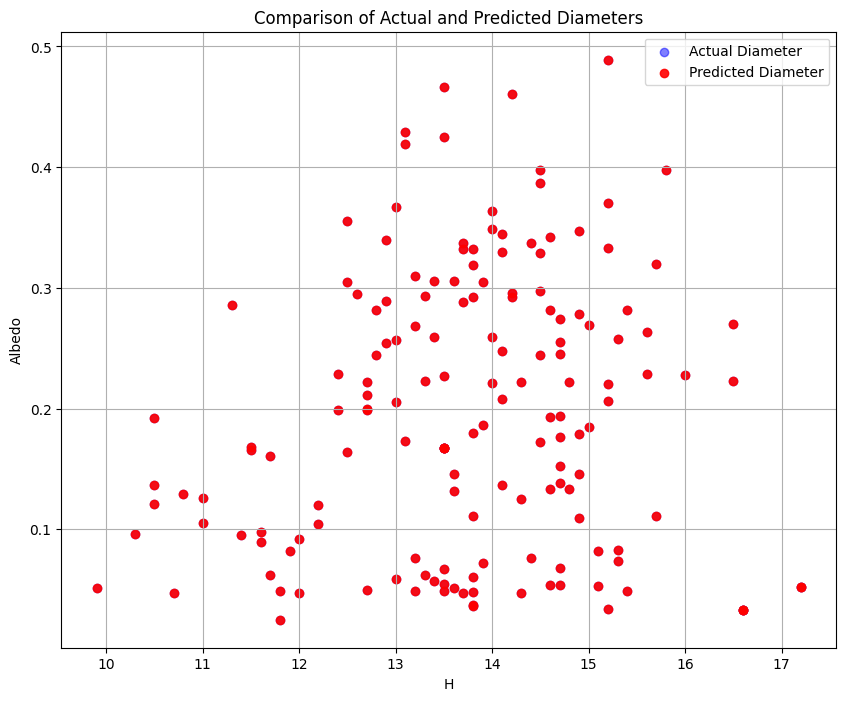

Графік збережено у файл ../data/comparison_overlay_plot.png


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Зчитуємо дані для порівняння
comparison_data = pd.read_csv('../data/comparison_table.csv')

# Створюємо фігуру
plt.figure(figsize=(10, 8))

# Додамо точки для дійсних значень діаметру
plt.scatter(
    comparison_data['H'], 
    comparison_data['albedo'], 
    color='blue', 
    alpha=0.5, 
    label='Actual Diameter'
)

# Додамо точки для спрогнозованих значень діаметру
plt.scatter(
    comparison_data['H'], 
    comparison_data['albedo'], 
    color='red', 
    alpha=0.9, 
    label='Predicted Diameter'
)

# Налаштування осей
plt.xlabel("H")
plt.ylabel("Albedo")
plt.title("Comparison of Actual and Predicted Diameters")
plt.legend()  # Додамо легенду
plt.grid(True)

# Збереження графіку
output_file = "../data/comparison_overlay_plot.png"
plt.savefig(output_file)
plt.show()

print(f"Графік збережено у файл {output_file}")

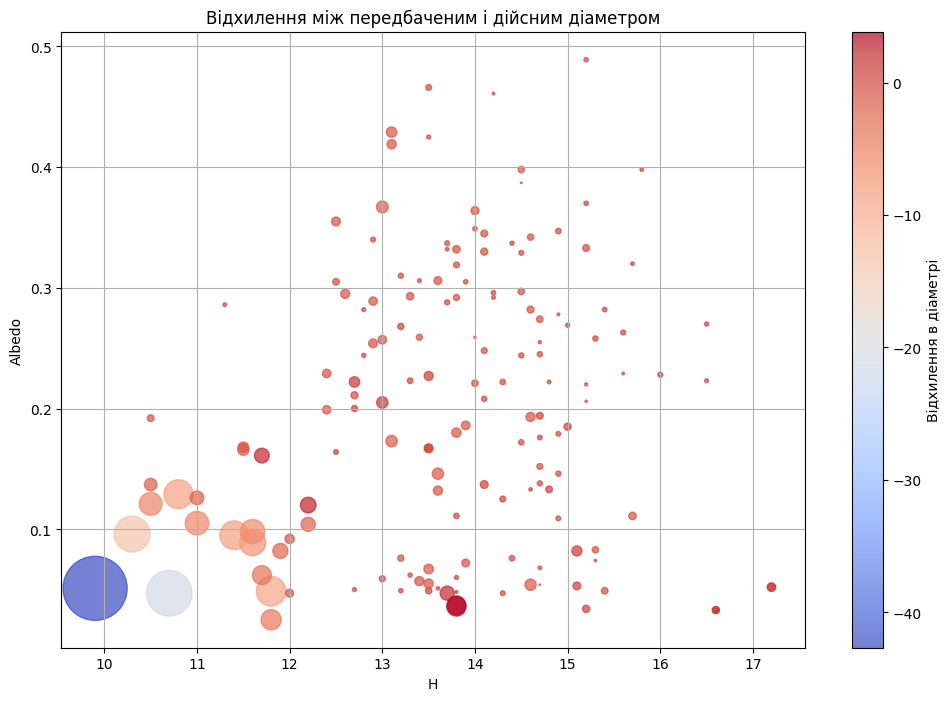

Графік збережено у файл ../data/deviation_scatter_plot.png


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Зчитуємо дані для порівняння
comparison_data = pd.read_csv('../data/comparison_table.csv')

# Обчислюємо відхилення в діаметрі
comparison_data['diameter_deviation'] = comparison_data['diameter_pred'] - comparison_data['actual_diameter']

# Нормалізуємо відхилення для використання в кольорах та розмірах
deviation_norm = np.abs(comparison_data['diameter_deviation'])  # Відхилення по діаметру
size_norm = deviation_norm * 50  # Масштабування для розміру точок

# Створюємо фігуру
plt.figure(figsize=(12, 8))

# Додамо точки для спрогнозованих та дійсних значень діаметру з відображенням відхилень
scatter = plt.scatter(
    comparison_data['H'], 
    comparison_data['albedo'], 
    c=comparison_data['diameter_deviation'],  # Колір залежить від відхилення
    s=size_norm,  # Розмір точок залежить від величини відхилення
    cmap='coolwarm',  # Використовуємо кольорову палітру для відображення відхилення
    alpha=0.7
)

# Додамо кольорову шкалу для відхилень
plt.colorbar(scatter, label='Відхилення в діаметрі')

# Налаштування осей
plt.xlabel("H")
plt.ylabel("Albedo")
plt.title("Відхилення між передбаченим і дійсним діаметром")
plt.grid(True)

# Збереження графіку
output_file = "../data/deviation_scatter_plot.png"
plt.savefig(output_file)
plt.show()

print(f"Графік збережено у файл {output_file}")

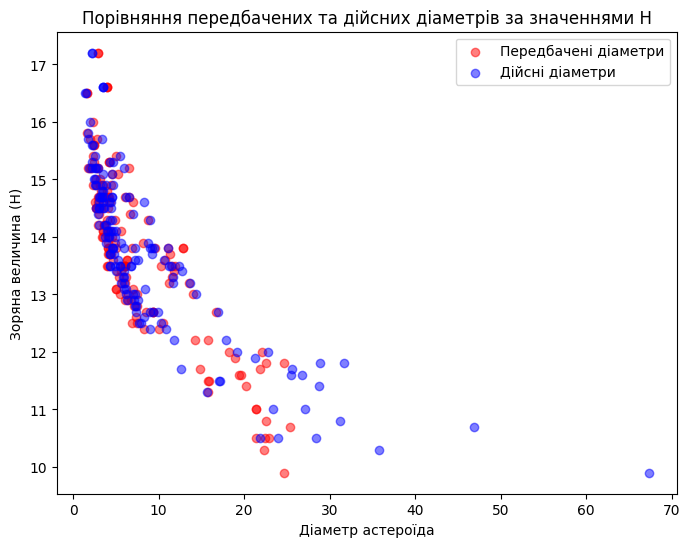

In [21]:
import matplotlib.pyplot as plt


# Зчитуємо дані для порівняння
df = pd.read_csv('../data/comparison_table.csv')

# Створення графіка для діаметра (x) та зоряної величини (y)
plt.figure(figsize=(8, 6))

# Точки для передбачених значень діаметра
plt.scatter(df['diameter_pred'], df['H'], color='red', alpha=0.5, label='Передбачені діаметри')

# Точки для дійсних значень діаметра
plt.scatter(df['actual_diameter'], df['H'], color='blue', alpha=0.5, label='Дійсні діаметри')

# Підписи та заголовок
plt.xlabel('Діаметр астероїда')
plt.ylabel('Зоряна величина (H)')
plt.title('Порівняння передбачених та дійсних діаметрів за значеннями H')

# Легенда
plt.legend()

# Показуємо графік
plt.show()


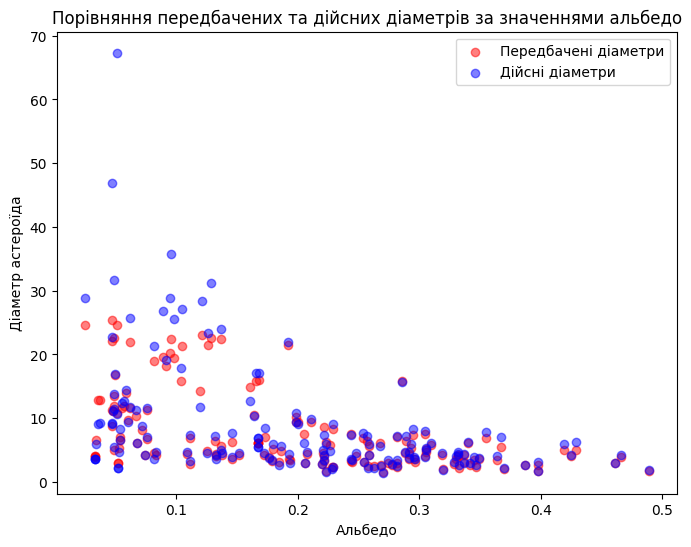

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Зчитуємо дані для порівняння
df = pd.read_csv('../data/comparison_table.csv')

# Створення графіка для альбедо (x) та діаметра (y)
plt.figure(figsize=(8, 6))

# Точки для передбачених значень діаметра
plt.scatter(df['albedo'], df['diameter_pred'], color='red', alpha=0.5, label='Передбачені діаметри')

# Точки для дійсних значень діаметра
plt.scatter(df['albedo'], df['actual_diameter'], color='blue', alpha=0.5, label='Дійсні діаметри')

# Підписи та заголовок
plt.xlabel('Альбедо')
plt.ylabel('Діаметр астероїда')
plt.title('Порівняння передбачених та дійсних діаметрів за значеннями альбедо')

# Легенда
plt.legend()

# Показуємо графік
plt.show()


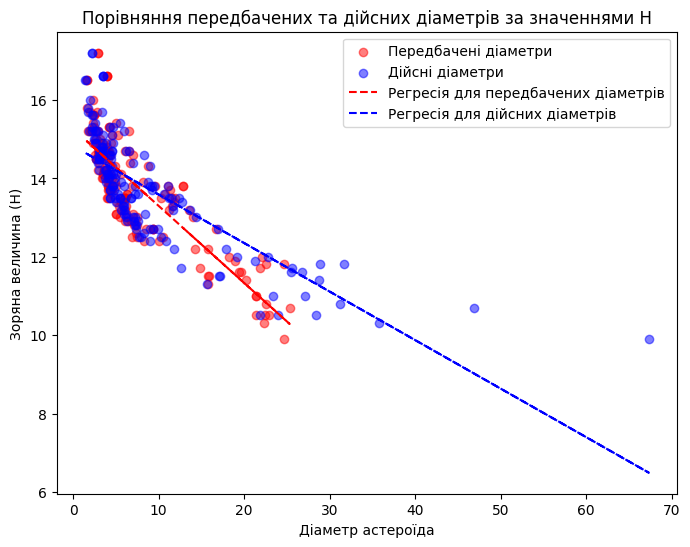

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Зчитуємо дані для порівняння
df = pd.read_csv('../data/comparison_table.csv')

# Створення графіка для діаметра (x) та зоряної величини (y)
plt.figure(figsize=(8, 6))

# Точки для передбачених значень діаметра
plt.scatter(df['diameter_pred'], df['H'], color='red', alpha=0.5, label='Передбачені діаметри')

# Точки для дійсних значень діаметра
plt.scatter(df['actual_diameter'], df['H'], color='blue', alpha=0.5, label='Дійсні діаметри')

# Створення ліній регресії для передбачених діаметрів
regressor_pred = LinearRegression()
regressor_pred.fit(df['diameter_pred'].values.reshape(-1, 1), df['H'])
pred_line = regressor_pred.predict(df['diameter_pred'].values.reshape(-1, 1))

# Створення ліній регресії для дійсних діаметрів
regressor_actual = LinearRegression()
regressor_actual.fit(df['actual_diameter'].values.reshape(-1, 1), df['H'])
actual_line = regressor_actual.predict(df['actual_diameter'].values.reshape(-1, 1))

# Додавання регресійних ліній на графік
plt.plot(df['diameter_pred'], pred_line, color='red', linestyle='--', label='Регресія для передбачених діаметрів')
plt.plot(df['actual_diameter'], actual_line, color='blue', linestyle='--', label='Регресія для дійсних діаметрів')

# Підписи та заголовок
plt.xlabel('Діаметр астероїда')
plt.ylabel('Зоряна величина (H)')
plt.title('Порівняння передбачених та дійсних діаметрів за значеннями H')

# Легенда
plt.legend()

# Показуємо графік
plt.show()

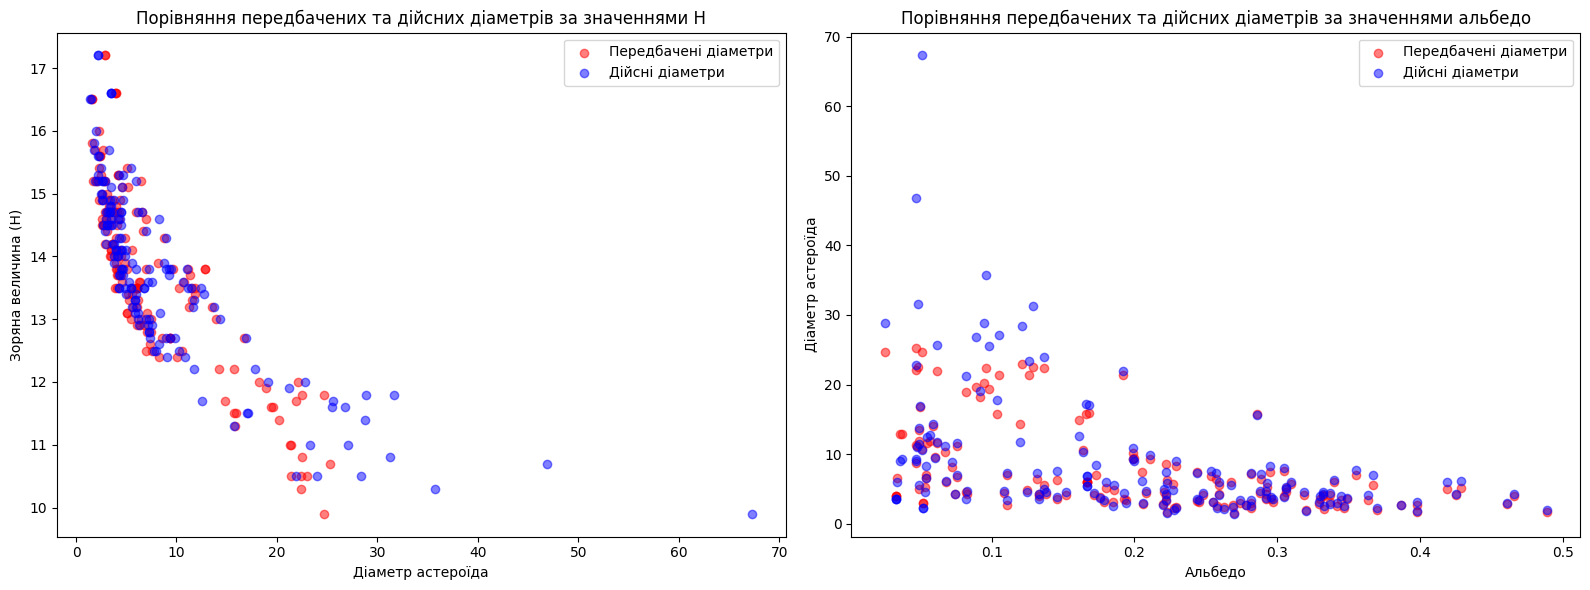

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Зчитуємо дані для порівняння
df = pd.read_csv('../data/comparison_table.csv')

# Створення графіка для діаметра (x) та зоряної величини (y)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Графік для діаметра по H
axs[0].scatter(df['diameter_pred'], df['H'], color='red', alpha=0.5, label='Передбачені діаметри')
axs[0].scatter(df['actual_diameter'], df['H'], color='blue', alpha=0.5, label='Дійсні діаметри')
axs[0].set_xlabel('Діаметр астероїда')
axs[0].set_ylabel('Зоряна величина (H)')
axs[0].set_title('Порівняння передбачених та дійсних діаметрів за значеннями H')
axs[0].legend()

# Графік для альбедо
axs[1].scatter(df['albedo'], df['diameter_pred'], color='red', alpha=0.5, label='Передбачені діаметри')
axs[1].scatter(df['albedo'], df['actual_diameter'], color='blue', alpha=0.5, label='Дійсні діаметри')
axs[1].set_xlabel('Альбедо')
axs[1].set_ylabel('Діаметр астероїда')
axs[1].set_title('Порівняння передбачених та дійсних діаметрів за значеннями альбедо')
axs[1].legend()

# Збереження графіка
plt.tight_layout()
plt.savefig('../models/logs/prediction_result/prediction_result.png')  # Шлях до збереження графіка

# Показуємо графік
plt.show()

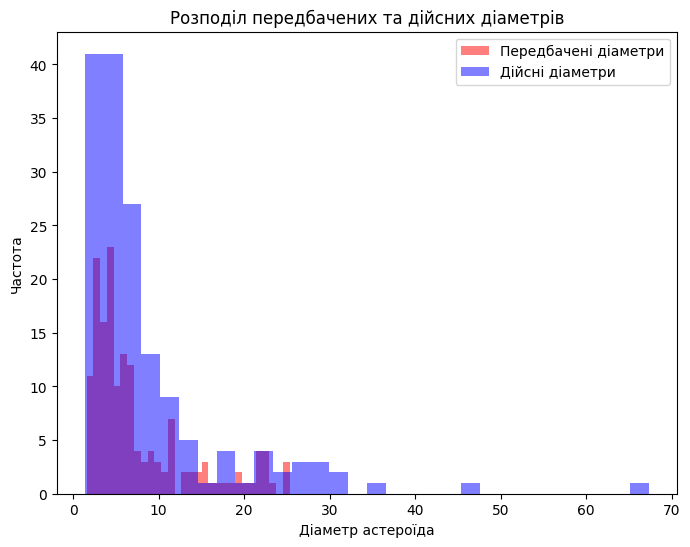

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Зчитуємо дані для порівняння
df = pd.read_csv('../data/comparison_table.csv')

plt.figure(figsize=(8, 6))
plt.hist(df['diameter_pred'], bins=30, alpha=0.5, color='red', label='Передбачені діаметри')
plt.hist(df['actual_diameter'], bins=30, alpha=0.5, color='blue', label='Дійсні діаметри')
plt.xlabel('Діаметр астероїда')
plt.ylabel('Частота')
plt.title('Розподіл передбачених та дійсних діаметрів')
plt.legend()
plt.show()
